In [37]:
from FeatureEngineering import *
from sklearn.metrics import precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [27]:
train_data = my_read_csv('train_data.csv')
test_data = my_read_csv('test_data.csv')

In [45]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [28]:
X_train,y_train = train_data.loc[:,train_data.columns != 'TARGET'],train_data.loc[:,['TARGET']]
X_test,y_test = test_data.loc[:,test_data.columns != 'TARGET'],test_data.loc[:,['TARGET']]

In [29]:
X_train

,DAYS_ID_PUBLISH,LIVE_REGION_NOT_WORK_REGION,OBS_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,SK_ID_CURR,REG_REGION_NOT_WORK_REGION,...,FLAG_DOCUMENT_9,FLAG_DOCUMENT_15,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_DOCUMENT_20,FLAG_DOCUMENT_2,FLAG_DOCUMENT_17,FLAG_MOBIL,FLAG_DOCUMENT_14
0,0.219007,0.00000,0.088773,0.532637,0.000000,0.000000,0.083255,-0.025925,0.176536,0.00000,...,0,0,0,5,0,0,0,0,0,0
1,0.497772,0.00000,0.000000,0.000000,0.000000,0.000000,0.332126,0.018693,0.018471,0.00000,...,0,0,0,32,0,0,0,0,0,0
2,0.244062,0.00000,0.000000,0.000000,0.000000,0.000000,0.018366,0.124580,0.122682,0.00000,...,0,0,0,5,0,0,0,0,0,0
3,-0.021161,0.00000,0.655762,0.000000,0.000000,0.000000,0.066854,-0.001934,0.164977,0.00000,...,0,0,0,56,0,0,0,0,0,0
4,-0.094912,0.00000,0.000000,0.000000,0.000000,0.000000,0.065102,-0.054577,0.033386,0.00000,...,0,0,0,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,0.323329,0.00000,0.000000,0.591230,0.000000,0.000000,-0.214116,-0.185740,-0.123578,0.00000,...,0,0,0,50,1,0,0,0,0,0
11724,0.221156,0.20915,0.209150,0.418300,0.000000,0.000000,-0.053542,-0.094395,-0.107616,0.20915,...,0,0,0,5,0,0,0,0,0,0
11725,0.096841,0.00000,0.195542,0.000000,0.000000,0.000000,0.020036,0.256974,-0.230770,0.00000,...,0,0,0,5,0,0,0,0,0,0
11726,0.334235,0.00000,0.000000,0.000000,0.000000,0.000000,0.129211,0.439194,-0.325373,0.00000,...,0,0,0,5,0,0,0,0,0,0


The evaluation matrix for Decision Tree

,Train,Test
Recall score,1.0,0.8140
Precision,1.0,0.7848
Roc-auc score,1.0,0.8981
Accuracy,1.0,0.9700


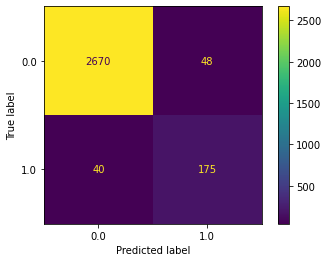

In [41]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
evaluate(clf, X_test, y_test, X_train, y_train)

In [39]:
def evaluate(estimator, X_test, y_test, X_train, y_train):
    y_pre_train = estimator.predict(X_train)
    recall_train = recall_score(y_train, y_pre_train)
    precision_train = precision_score(y_train, y_pre_train)
    y_pre_test = estimator.predict(X_test)
    recall_test = recall_score(y_test, y_pre_test)
    y_pre_prob_train = estimator.predict_proba(X_train)[:, 1]
    roc_auc_train = roc_auc_score(y_train, y_pre_prob_train)
    acc_train = accuracy_score(y_train, y_pre_train)
    y_pre_prob_test = estimator.predict_proba(X_test)[:, 1]
    precision_test = precision_score(y_test, y_pre_test)
    acc_test = accuracy_score(y_test, y_pre_test)
    roc_auc_test = roc_auc_score(y_test, y_pre_prob_test)
    train_ev_list = [recall_train, precision_train, roc_auc_train,acc_train]
    test_ev_list = [recall_test,precision_test,roc_auc_test,acc_test]
    ev_df = pd.DataFrame(data = [train_ev_list, test_ev_list], index=['Train','Test'], columns = ['Recall score','Precision','Roc-auc score','Accuracy']).T
    plot_confusion_matrix(clf, X_test, y_test)
    return ev_df.round(4)



As we can see, radom forest has lower variance than Decision tree.

,Train,Test
Recall score,1.0,0.7907
Precision,1.0,1.0000
Roc-auc score,1.0,0.9856
Accuracy,1.0,0.9847


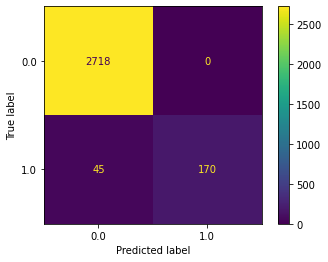

In [40]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
evaluate(clf, X_test, y_test, X_train, y_train)

In [42]:
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [6]:
!pip install tpot
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 2.4 MB/s eta 0:00:00
  Using cached xgboost-1.5.2.tar.gz (730 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in deap setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'tpot'

In [ ]:
y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

print(f'Baseline neg. MSE = {baseline:.2f}')
print(f'Random search neg. MSE = {y_rs[-1]:.2f}')
print(f'Bayesian optimization neg. MSE = {y_bo[-1]:.2f}')

plt.plot(y_rs, 'ro-', label='Random search')
plt.plot(y_bo, 'bo-', label='Bayesian optimization')
plt.xlabel('Iteration')
plt.ylabel('Neg. MSE')
plt.ylim(-5000, -3000)
plt.title('Value of the best sampled CV score');
plt.legend();